# Lambda Functions

## Introduction

Lambda functions are often a convenient way to write *throw-away* functions on the fly. If you need to write a more complicated function you may still need to use the more formal `def` method, but lambda functions provide a quick and concise way to write functions.

## Objectives

You will be able to:

* Describe the purpose of lambda functions, when they should be employed, and their limitations   
* Create lambda functions to use as arguments of other functions   
* Use the `.map()` or `.apply()` method to apply a function to a pandas series or DataFrame


## Example

Let's say you want to count the number of words in each yelp review.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
df = pd.read_csv('/content/Yelp_Reviews.csv', index_col=0)
df.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g


In [22]:
df['text'].map(lambda a: len(a.split())).head(7)

,text
1,58
2,30
4,30
5,82
10,32
11,49
12,21


In [23]:
import pandas as pd

egz = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

    # Applying a function to sum each row
row_sums = egz.apply(sum, axis=1)
print(row_sums)
    # To see the output, run the code.

0    5
1    7
2    9
dtype: int64


In [24]:
import pandas as pd

s = pd.Series([1, 2, 3])

    # Applying a lambda function to square each element
squared_s = s.map(lambda x: x**2)
print(squared_s)

    # To see the output, run the code.

0    1
1    4
2    9
dtype: int64


In [25]:
import pandas as pd

egz_2 = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

    # Applying a lambda function to square each element
squared = egz_2.applymap(lambda x: x**2)
print(squared)

    # To see the output, run the code.

   A   B
0  1  16
1  4  25
2  9  36


<ipython-input-25-6c3acddb0659>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  squared = egz_2.applymap(lambda x: x**2)


Similar to defining functions in general or naming the iterable in `for` loops, the variable that you use after calling the `lambda` keyword does not matter:

In [26]:
df['text'].map(lambda review_text: len(review_text.split())).head()

,text
1,58
2,30
4,30
5,82
10,32


In [33]:
word_counts = []
for review in df['text']:
    word_counts.append(len(review.split()))
df['word_count'] = word_counts
print('\n'.join(map(str,word_counts[:5])))

58
30
30
82
32


## Lambda functions with conditionals
Lambda functions can also accept some conditionals if chained in a list comprehension

In [38]:
def categorize_review(text):
    for word in ['awesome', 'love', 'good', 'great']:
        if word in text.lower():
            return 'Good'
    return 'Bad'

df['text'].map(categorize_review).head()

,text
1,Good
2,Bad
4,Good
5,Bad
10,Bad


In [39]:
df['text'].map(lambda x: 'Good' if any([word in x.lower()
for word in ['awesome', 'love', 'good', 'great']])
else 'Bad').head(7)

,text
1,Good
2,Bad
4,Good
5,Bad
10,Bad
11,Bad
12,Bad


## Note
The above is terribly poor style and does in no way represent [PEP 8](https://www.python.org/dev/peps/pep-0008/) or Pythonic style. (For example, no line should be over 72 characters according to PEP 8; the previous line was 127 characters.) That said, it is an interesting demonstration of chaining a conditional, any method, and a list comprehension all inside a lambda function!   
Shew!

## Returning to a more manageable example...

Perhaps we want to naively select the year from the date string rather than convert it to a datetime object.

In [40]:
df.date.map(lambda x: x[:4]).head()

,date
1,2012
2,2014
4,2014
5,2011
10,2016


In [53]:
#attempt to convert string to datetime obj
df['date'] = pd.to_datetime(df['date'].str[:4], format='%Y', errors = 'coerce').head()

AttributeError: Can only use .str accessor with string values!

## Lambda functions are also useful within the `sort()` function


In [54]:
# Without a key
names = ['Miriam Marks','Sidney Baird','Elaine Barrera','Eddie Reeves','Marley Beard',
         'Jaiden Liu','Bethany Martin','Stephen Rios','Audrey Mayer','Kameron Davidson',
         'Carter Wong','Teagan Bennett']
sorted(names)

['Audrey Mayer',
 'Bethany Martin',
 'Carter Wong',
 'Eddie Reeves',
 'Elaine Barrera',
 'Jaiden Liu',
 'Kameron Davidson',
 'Marley Beard',
 'Miriam Marks',
 'Sidney Baird',
 'Stephen Rios',
 'Teagan Bennett']

In [56]:
# Sorting by last name
names = ['Miriam Marks','Sidney Baird','Elaine Barrera','Eddie Reeves','Marley Beard',
         'Jaiden Liu','Bethany Martin','Stephen Rios','Audrey Mayer','Kameron Davidson',
'Teagan Bennett']
sorted(names, key=lambda x: x.split()[-1])


['Sidney Baird',
 'Elaine Barrera',
 'Marley Beard',
 'Teagan Bennett',
 'Kameron Davidson',
 'Jaiden Liu',
 'Miriam Marks',
 'Bethany Martin',
 'Audrey Mayer',
 'Eddie Reeves',
 'Stephen Rios']

## A general approach to writing [Data Transformation] Functions

Above, we've covered a lot of the syntax of lambda functions, but the thought process for writing these complex transformations was not transparent. Let's take a minute to discuss some approaches to tackling these problems.

## Experiment and solve for individual cases first

Before trying to write a function to apply to an entire series, it's typically easier to attempt to solve for an individual case. For example, if we're trying to determine the number of words in a review, we can try and do this for a single review first.

First, choose an example field that you'll be applying the function to.

In [58]:
example = df['text'].iloc[1]
example

'Terrible. Dry corn bread. Rib tips were all fat and mushy and had no flavor. If you want bbq in this neighborhood go to john mulls roadkill grill. Trust me.'

Then start writing the function for that example. For example, if we need to count the number of words, it's natural to first divide the review into words. A natural way to do this is with the str.split() method.

In [59]:
example.split()

['Terrible.',
 'Dry',
 'corn',
 'bread.',
 'Rib',
 'tips',
 'were',
 'all',
 'fat',
 'and',
 'mushy',
 'and',
 'had',
 'no',
 'flavor.',
 'If',
 'you',
 'want',
 'bbq',
 'in',
 'this',
 'neighborhood',
 'go',
 'to',
 'john',
 'mulls',
 'roadkill',
 'grill.',
 'Trust',
 'me.']

Then we just need to count this!

In [60]:
len(example.split())

30

## Then return to solving for all!

In [61]:
df['text'].map(lambda x: len(x.split())).head()

,text
1,58
2,30
4,30
5,82
10,32


## Watch for edge cases and exceptions

When generalizing from a single case to all cases, it's important to consider exceptions or edge cases. For example, in the above example, you might wonder whether extra spaces or punctuations effects the output.

In [64]:
'this is a         very  weird test!!!    Can we break it??'.split()

['this', 'is', 'a', 'very', 'weird', 'test!!!', 'Can', 'we', 'break', 'it??']

As you can see, extra spaces won't break our function, but missing a space after punctuation will. Perhaps this is a rare enough event that we don't worry further, but exceptions are always something to consider when writing functions.

## Other Common Patterns: the % and // operators

Another common pattern that you may find very useful is the modulus or remainder operator (%), as well as the floor division operator (//). These are both very useful when you want behavior such as 'every fourth element' or 'groups of three consecutive elements'. Let's investigate a couple of examples.

### The modulus operator (%)
Useful for queries such as 'every other element' or 'every fifth element' etc.

In [65]:
# Try a single example
3%2

1

In [66]:
# and another
2%2

0

In [77]:
# Generalize the pattern: every other
for i in range(2,11):
    print(f'i: {i}, i%2: {i%2}')

i: 2, i%2: 0
i: 3, i%2: 1
i: 4, i%2: 0
i: 5, i%2: 1
i: 6, i%2: 0
i: 7, i%2: 1
i: 8, i%2: 0
i: 9, i%2: 1
i: 10, i%2: 0


### The floor division (//) operator
Useful for creating groups of a set size. For example: groups of ten, groups of seven, etc.

In [68]:
# Try a single example
9//3

3

In [69]:
# and another
5//3

1

In [75]:
# Creating groups of 7
for i in range(1,29):
    print(f'i: {i}, i//7: {i//7}')

i: 1, i//7: 0
i: 2, i//7: 0
i: 3, i//7: 0
i: 4, i//7: 0
i: 5, i//7: 0
i: 6, i//7: 0
i: 7, i//7: 1
i: 8, i//7: 1
i: 9, i//7: 1
i: 10, i//7: 1
i: 11, i//7: 1
i: 12, i//7: 1
i: 13, i//7: 1
i: 14, i//7: 2
i: 15, i//7: 2
i: 16, i//7: 2
i: 17, i//7: 2
i: 18, i//7: 2
i: 19, i//7: 2
i: 20, i//7: 2
i: 21, i//7: 3
i: 22, i//7: 3
i: 23, i//7: 3
i: 24, i//7: 3
i: 25, i//7: 3
i: 26, i//7: 3
i: 27, i//7: 3
i: 28, i//7: 4


### Combining % and //

Combining the two can be very useful, such as when creating subplots!
Below we iterate through 12 elements arranging them into 3 rows and 4 columns.

In [81]:
for i in range(13):
    print(f'i: {i}, Row: {i//4} Column: {i%4}')

i: 0, Row: 0 Column: 0
i: 1, Row: 0 Column: 1
i: 2, Row: 0 Column: 2
i: 3, Row: 0 Column: 3
i: 4, Row: 1 Column: 0
i: 5, Row: 1 Column: 1
i: 6, Row: 1 Column: 2
i: 7, Row: 1 Column: 3
i: 8, Row: 2 Column: 0
i: 9, Row: 2 Column: 1
i: 10, Row: 2 Column: 2
i: 11, Row: 2 Column: 3
i: 12, Row: 3 Column: 0


In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

IndexError: index 3 is out of bounds for axis 0 with size 3

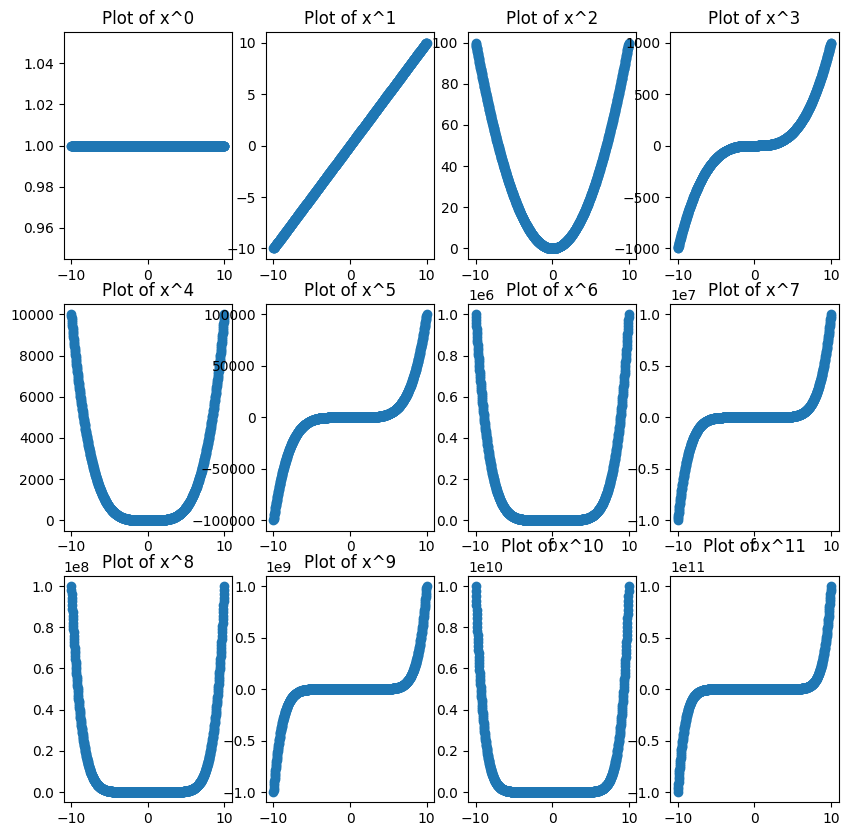

In [84]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,10))
x = np.linspace(start=-10, stop=10, num=10*83)
for i in range(13):
    row = i//4
    col = i%4
    ax = axes[row, col]
    ax.scatter(x, x**i)
    ax.set_title(f'Plot of x^{i}')
plt.show()

## Summary

Lambda functions can be a convenient way to write "throw away" functions that you want to declare inline. In the next lesson we'll give you some practice with creating them!